In [371]:
import numpy as np
import matplotlib.pyplot as plt

In [372]:
sample_num = 50
split_rate = 0.2 # HOW TO DIVIDE TRAINING DATA AND TESTING DATA
c = np.round(np.random.uniform(-127,100,sample_num))
#c.sort()
f = np.round((9/5)*c + 32)

In [373]:
# original data combine with bias,
# just like y = Ax + b
c = c.reshape(-1,1)
c_b = np.concatenate((c, np.ones(len(c)).reshape(-1,1)), axis=1)

# training data
train_X = c_b[:-round(sample_num*split_rate)]
train_y = f[:-round(sample_num*split_rate)]

# testing data
test_X = c_b[-round(sample_num*split_rate):]
test_y = f[-round(sample_num*split_rate):]

In [374]:
def least_square_equation(X, y):
    # write down the answer of Least square equation !
    # (X.T*X)^-1*X.T*y
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

In [375]:
def sum_of_square_error(fx, y):
    E = y - fx
    # write down the answer of Sum square error !
    # E.T*E
    return np.dot(E.T,E)

In [376]:
def linear_regression(X, y):
    W = least_square_equation(X, y)
    return W # the weight A ([weight]*[x] = [y])

In [377]:
weight = linear_regression(train_X,train_y) # get weight
pred_y = np.sum(weight*test_X, axis=1) # weight * X
SSE = sum_of_square_error(pred_y, test_y) # get current error
pred_y-test_y # the individual error 

array([-0.36044479, -0.38767335, -0.19608945,  0.19079134, -0.19856477,
        0.21306925,  0.02891132,  0.38732589,  0.21059392, -0.392624  ])

In [378]:
SSE # the total error in this testing phase

0.7892505621168828

In [379]:
weight # the predict weight as opposed to initial weight: (9/5)*x + 32

array([ 1.79975247, 32.01034639])

In [380]:
# the prediction curve
X = np.arange(-127, 101,1)
x = np.concatenate((X.reshape(-1,1), np.ones(len(X)).reshape(-1,1)), axis=1)
fx = fx = np.dot(x, weight)

In [381]:
# the actural curve
real_X = np.arange(-127, 101,1)
real_fx = np.round((9/5)*X + 32)

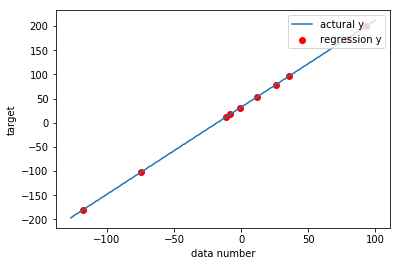

In [382]:
plt.plot(real_X,real_fx, label='actural y') # the actural curve 
#plt.plot(X,fx, label='predict y') # the prediction curve
plt.scatter(test_X[:,0] ,pred_y,  label='regression y',c='r')
plt.legend(loc='upper right')
plt.ylabel('target')
plt.xlabel('data number')
plt.show()